# T-SNE Alorithms
t-SNE (t-distributed Stochastic Neighbor Embedding) is a popular machine learning algorithm used for dimensionality reduction and visualization of high-dimensional data. It transforms complex, high-dimensional data into two or three dimensions, making it easier to visualize and interpret.

### Key Points:
1. **Non-Linear Dimensionality Reduction**: Unlike linear methods like PCA, t-SNE captures non-linear relationships in the data.
2. **Preserves Local Structure**: t-SNE is designed to preserve the local structure of the data, meaning that points that are close in high-dimensional space will remain close in the lower-dimensional embedding.
3. **Stochastic Nature**: The algorithm uses a probabilistic approach, where it models pairwise similarities between points in both the high-dimensional and low-dimensional spaces.
4. **Perplexity**: A key hyperparameter that balances the attention given to local vs. global aspects of the data structure (related to the number of nearest neighbors considered).
5. **Applications**: t-SNE is widely used for visualizing clusters or patterns in data, particularly in fields like computer vision and natural language processing, where datasets often have many dimensions.

Overall, t-SNE is an effective tool for visualizing complex data in a way that is intuitive and revealing, especially when trying to understand patterns and clusters.




### Summary of Implementaion and related methods:
- **Imports**: Bring in necessary libraries (`sklearn`, `numpy`, `matplotlib`).
- **Load Dataset**: Fetch the MNIST dataset and normalize the image data.
- **Sample Data**: Randomly select a subset of the dataset for efficiency.
- **t-SNE**: Apply the t-SNE algorithm to reduce the dimensionality of the data to 2 components for visualization.
- **Visualization**: Plot the resulting 2D data points, color-coded by digit, and add appropriate labels, titles, and a legend.


### 1. **Library Imports**

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


- **`from sklearn.datasets import fetch_openml`**: Imports the `fetch_openml` function from the `sklearn.datasets` module. This function is used to fetch datasets from OpenML, a public repository of datasets. In this case, it will be used to fetch the MNIST dataset.
  
- **`import numpy as np`**: Imports the `numpy` library, which is used for numerical operations, especially with arrays and matrices. It is aliased as `np` for convenience.

- **`import matplotlib.pyplot as plt`**: Imports the `pyplot` module from the `matplotlib` library, which is used for creating plots and visualizations. It is aliased as `plt`.

- **`from sklearn.manifold import TSNE`**: Imports the `TSNE` class from `sklearn.manifold`. t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique used for visualizing high-dimensional data in two or three dimensions.

### 2. **Loading the Dataset**


In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target



- **`mnist = fetch_openml('mnist_784', version=1)`**: Fetches the MNIST dataset from OpenML. The `mnist_784` identifier corresponds to the full MNIST dataset containing 70,000 28x28 grayscale images of handwritten digits (0-9). The `version=1` ensures that the latest version of the dataset is fetched.

- **`X, y = mnist.data / 255.0, mnist.target`**: 
  - **`X = mnist.data / 255.0`**: This normalizes the pixel values of the images by dividing by 255 (since pixel values range from 0 to 255). The `mnist.data` contains the image data in a flattened format (each image is represented as a 784-dimensional vector, i.e., 28x28 pixels).
  - **`y = mnist.target`**: `mnist.target` contains the labels for the images, indicating which digit (0-9) each image represents.

### 3. **Sampling the Dataset**


In [8]:
sample_size = 5000
indices = np.random.choice(range(X.shape[0]), sample_size, replace=False)
X_sample = X.iloc[indices]
y_sample = y.iloc[indices]


- **`sample_size = 5000`**: Specifies the number of samples to use for t-SNE. The MNIST dataset is large (70,000 images), so we select a smaller sample size (5,000 images) to speed up the t-SNE computation.

- **`indices = np.random.choice(range(X.shape[0]), sample_size, replace=False)`**: 
  - **`np.random.choice(range(X.shape[0]), sample_size, replace=False)`**: Generates a random selection of 5,000 unique indices from the range of available indices in `X` (i.e., 0 to 69,999). `replace=False` ensures that the indices are not repeated (i.e., each image is selected only once).

- **`X_sample = X.iloc[indices]`**: Selects the images corresponding to the randomly chosen indices from the `X` DataFrame.

- **`y_sample = y.iloc[indices]`**: Selects the labels corresponding to the randomly chosen indices from the `y` Series.

### 4. **Applying t-SNE**


In [9]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
X_tsne = tsne.fit_transform(X_sample)



- **`tsne = TSNE(...)`**: Initializes a `TSNE` object with specific parameters:
  - **`n_components=2`**: Specifies that the data should be reduced to 2 dimensions. These two components will allow us to visualize the data in a 2D plot.
  - **`perplexity=30`**: This is a parameter related to the number of nearest neighbors considered for each point. It affects how the local and global structure of the data is balanced. Typical values range from 5 to 50.
  - **`n_iter=3000`**: Specifies the number of iterations for the optimization process. A higher number of iterations often leads to better convergence.
  - **`random_state=42`**: Sets the random seed for reproducibility. By using the same random seed (42), the results will be consistent across runs.

- **`X_tsne = tsne.fit_transform(X_sample)`**: Applies t-SNE to the sampled dataset `X_sample`:
  - **`fit_transform`**: This method first fits the t-SNE model to the data and then transforms the data into the new 2D space. The result is stored in `X_tsne`, which is an array of shape `(5000, 2)`, where each row represents a data point in the 2D space.

### 5. **Visualizing the Data**


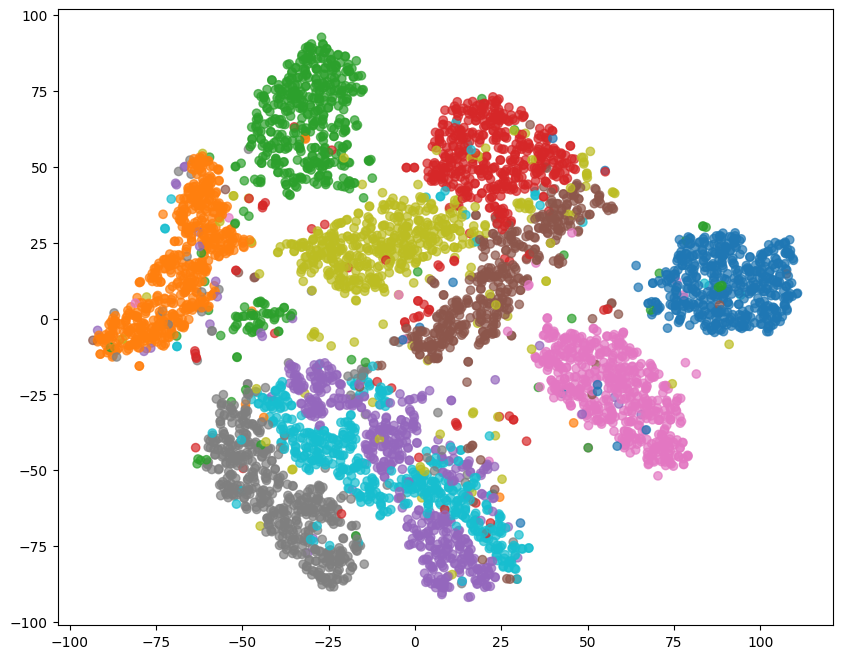

In [7]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample.astype(int), cmap='tab10', alpha=0.7)



- **`plt.figure(figsize=(10, 8))`**: Creates a new figure for plotting with a size of 10 inches by 8 inches. This controls the overall size of the plot.

- **`scatter = plt.scatter(...)`**: Creates a scatter plot using the `scatter` function:
  - **`X_tsne[:, 0]`**: Specifies the x-coordinates of the points in the scatter plot (the first component of the t-SNE output).
  - **`X_tsne[:, 1]`**: Specifies the y-coordinates of the points (the second component of the t-SNE output).
  - **`c=y_sample.astype(int)`**: Colors the points based on their corresponding digit labels. The `.astype(int)` ensures that the labels are treated as integers.
  - **`cmap='tab10'`**: Specifies the colormap to use for coloring the points. `'tab10'` is a categorical colormap with 10 distinct colors, suitable for visualizing the 10 digit classes (0-9).
  - **`alpha=0.7`**: Sets the transparency of the points to 70%, allowing overlapping points to be more distinguishable.

### 6. **Adding Legend and Titles**


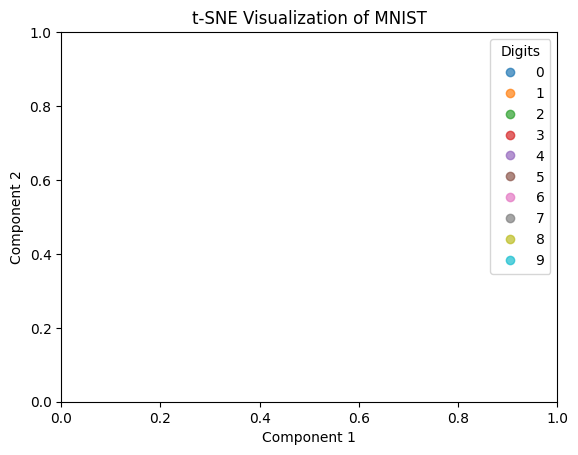

In [6]:
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE Visualization of MNIST")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()



- **`plt.legend(*scatter.legend_elements(), title="Digits")`**: Adds a legend to the plot, indicating which color corresponds to which digit. `scatter.legend_elements()` automatically generates the necessary elements for the legend based on the colors in the scatter plot. The `title="Digits"` argument gives the legend a title.
  
- **`plt.title("t-SNE Visualization of MNIST")`**: Adds a title to the plot.

- **`plt.xlabel("Component 1")`**: Labels the x-axis as "Component 1", which represents the first principal component in the 2D t-SNE space.

- **`plt.ylabel("Component 2")`**: Labels the y-axis as "Component 2", representing the second principal component in the 2D t-SNE space.

- **`plt.show()`**: Displays the plot. Without this line, the plot would not render in some environments, especially in non-interactive environments like scripts or Jupyter notebooks.
